In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
data_basepath  = '/content/drive/My Drive/traffic_lights_research/kaggle/'

In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [15]:
os.chdir('drive/My Drive/traffic_lights_research/kaggle/')
!ls
# Check if you are in kaggle and dayTrain folder in this root

Annotations.zip   dayTrain.zip	      sample-dayClip6.zip
daySequence1.zip  nightSequence1.zip  sample-nightClip1.zip
daySequence2.zip  nightSequence2.zip
dayTrain	  nightTrain.zip


In [0]:
!ls 'dayTrain/dayClip1/frames'

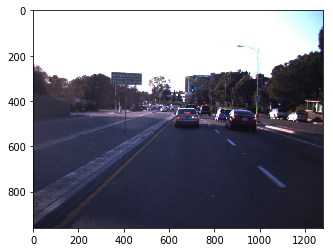

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

data_dir = 'dayTrain/dayClip1/frames'
img=mpimg.imread(os.path.join(data_dir, 'dayClip1--00000.jpg'))
imgplot = plt.imshow(img)

In [0]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


# Set data_dir variable
data_dir = 'dayTrain/dayClip1/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, ''),
                                          data_transforms[x])
                  for x in ['train']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


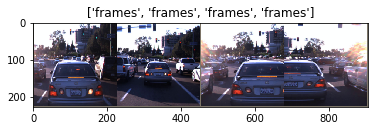

In [35]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])